# Complementing measurements
In the previous sections, we saw a couple of examples with different kinds of data and image features. Now it is time to put everything together. Here we definitely recommend using the `Project` classes. We will use the real data this time, so expect longer computation times. This first section will be a short recap of the previous chapter since we did not apply the steps to the real data yet.

## Setting up the project

In [1]:
from msi_workflow import get_project
import user_params

path_folder = user_params.path_folder_real_data  # feel free to replace this by your data

project = get_project(is_MSI=True, path_folder=path_folder)

In [2]:
project

path_folder: C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
d_folder: 2018_08_27 Cariaco 490-495 alkenones.d
mis_file: 2018_08_27 Cariaco 490-495 alkenones.mis
AgeModel_file: AgeModel.pickle
peaks_file: peaks.sqlite
Spectra_file: Spectra.hdf5
ImageClassified_file: ImageClassified.pickle
ImageROI_file: ImageROI.pickle
ImageSample_file: ImageSample.pickle
SampleImageHandlerMSI_file: SampleImageHandlerMSI.pickle
_is_laminated: True

## Setting the age model
Since it does not depend on any other objects, it is good to start with that

In [3]:
from msi_workflow import AgeModel

depth_span = (490, 495)

age_model = AgeModel(age=(0, 100), depth=depth_span)
project.age_model = age_model
project.set_depth_span(depth_span)
project.set_age_span()

print(project)

path_folder: C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
d_folder: 2018_08_27 Cariaco 490-495 alkenones.d
mis_file: 2018_08_27 Cariaco 490-495 alkenones.mis
AgeModel_file: AgeModel.pickle
peaks_file: peaks.sqlite
Spectra_file: Spectra.hdf5
ImageClassified_file: ImageClassified.pickle
ImageROI_file: ImageROI.pickle
ImageSample_file: ImageSample.pickle
SampleImageHandlerMSI_file: SampleImageHandlerMSI.pickle
_is_laminated: True
_age_model: _save_file: None
path_folder: None
_in_file: None
column_depth: depth
column_age: age
df: Pandas DataFrame with columns [depth, age], indices [0, 1] and shape (2, 2)
depth_span: [490, 495]
age_span: [0.0, 100.0]


## Setting Images
Usually, it is more convenient to start with setting the images (`SampleImageHandler`, `ImageSample`, etc.)

In [4]:
overwrite_all = False
plts = False
%matplotlib inline

_ = project.require_image_handler(overwrite=overwrite_all or False, plts=plts)
_ = project.require_image_sample(overwrite=overwrite_all or False, plts=plts)
_ = project.require_image_roi(overwrite=overwrite_all or False, plts=plts)
_ = project.require_image_classified(overwrite=overwrite_all or False)

Let's check the results

In [5]:
if plts:
    project.image_handler.plot_overview()
    project.image_sample.plot_overview()
    project.image_roi.plot_overview()
    project.image_classified.plot_overview()

By the way, you can shortcut all the `require` calls with `project.require_images`.

## Setting X-ray
We will use the image from the X-ray chapter but initialize a new instance for the sake of this tutorial

In [6]:
project.require_xray(path_image_file=r'Data\MD_03_2621_480-510_sliced_1200dpi.tif')

obj_color: dark
image_file: MD_03_2621_480-510_sliced_1200dpi.tif
_hw: [2423, 14760]
_image: Numpy array of type uint8, with shape (2423, 14760, 3)
path_folder: Data
depth_section: [480, 510]
_bars_removed: True
_use_rotated: True
_angle: -0.24854278564453125
_center_xy: [7470.5811, 1189.1254]
_xywh_ROI: [368, 855, 14261, 722]

## Setting Data
Ok, now for the real deal. If you did not evoke a hdf5 file yet, this step will take a while. Remember, that you can skip this 
* by always providing a `ReadBrukerMCF` instance when a reader is required by functions, but you will only save disk space, not time
* when you already saved a `Spectra` object

In [7]:
project.require_hdf_reader()

Adding spectra: 100%|███████████████████████████████████████████████████████████| 17118/17118 [00:20<00:00, 816.36it/s]


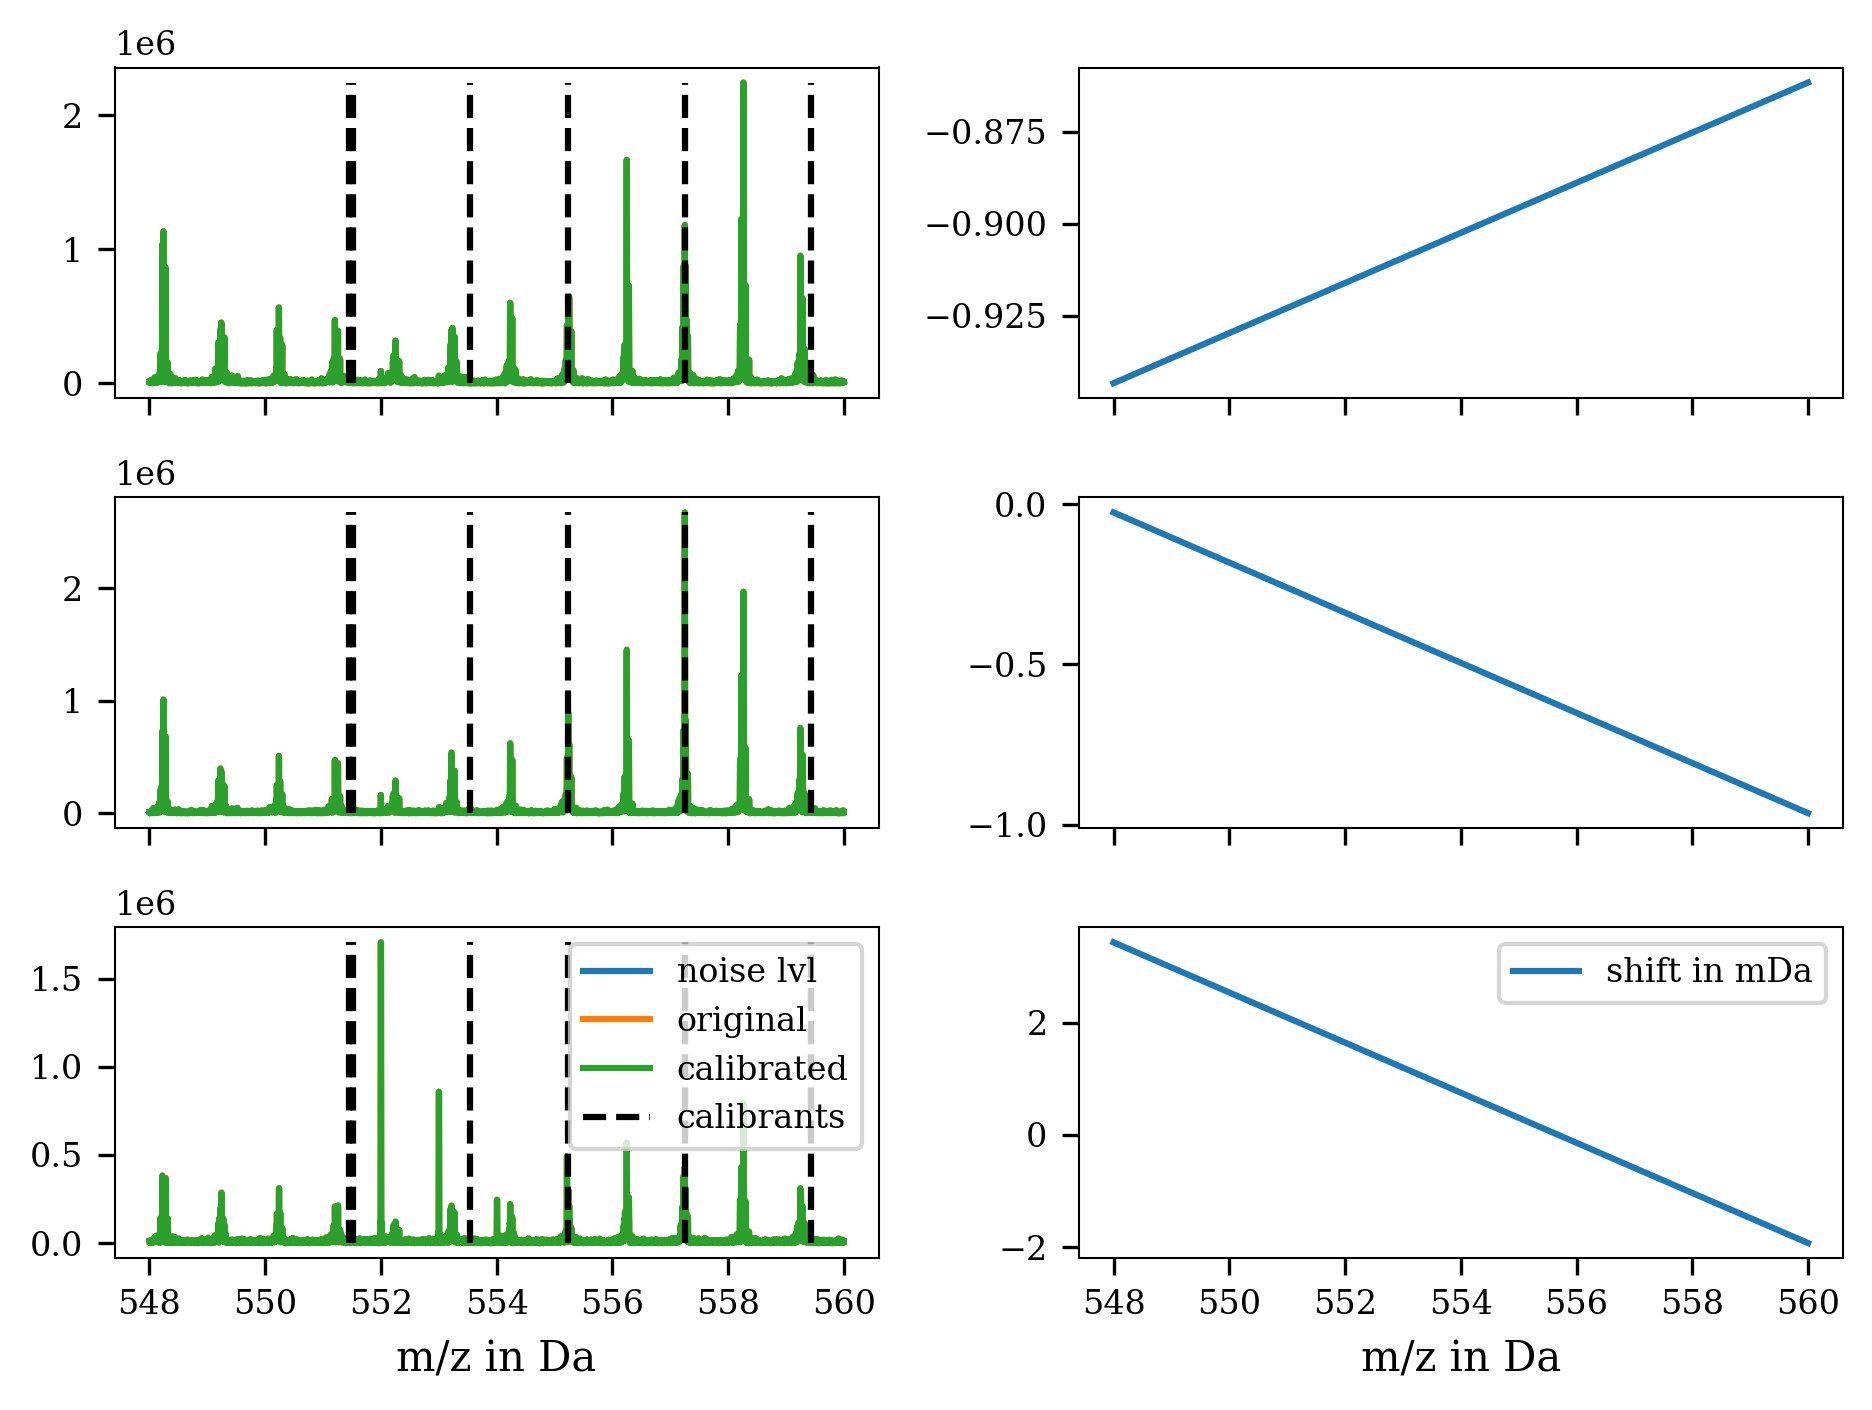

Adding spectra: 100%|██████████████████████████████████████████████████████████| 17118/17118 [00:13<00:00, 1224.11it/s]
sigma of kernel (6.2 mDa) with index 442 is bigger than max (5.0 mDa), halfing sigma.
encountered a value error while trying to find parameters for peak with index 442: 
 `x0` is infeasible. 
This can happen for double peaks.
sigma of kernel (5.4 mDa) with index 117 is bigger than max (5.0 mDa), halfing sigma.
encountered a value error while trying to find parameters for peak with index 117: 
 `x0` is infeasible. 
This can happen for double peaks.
binning spectra: 100%|█████████████████████████████████████████████████████████| 17118/17118 [00:12<00:00, 1401.34it/s]


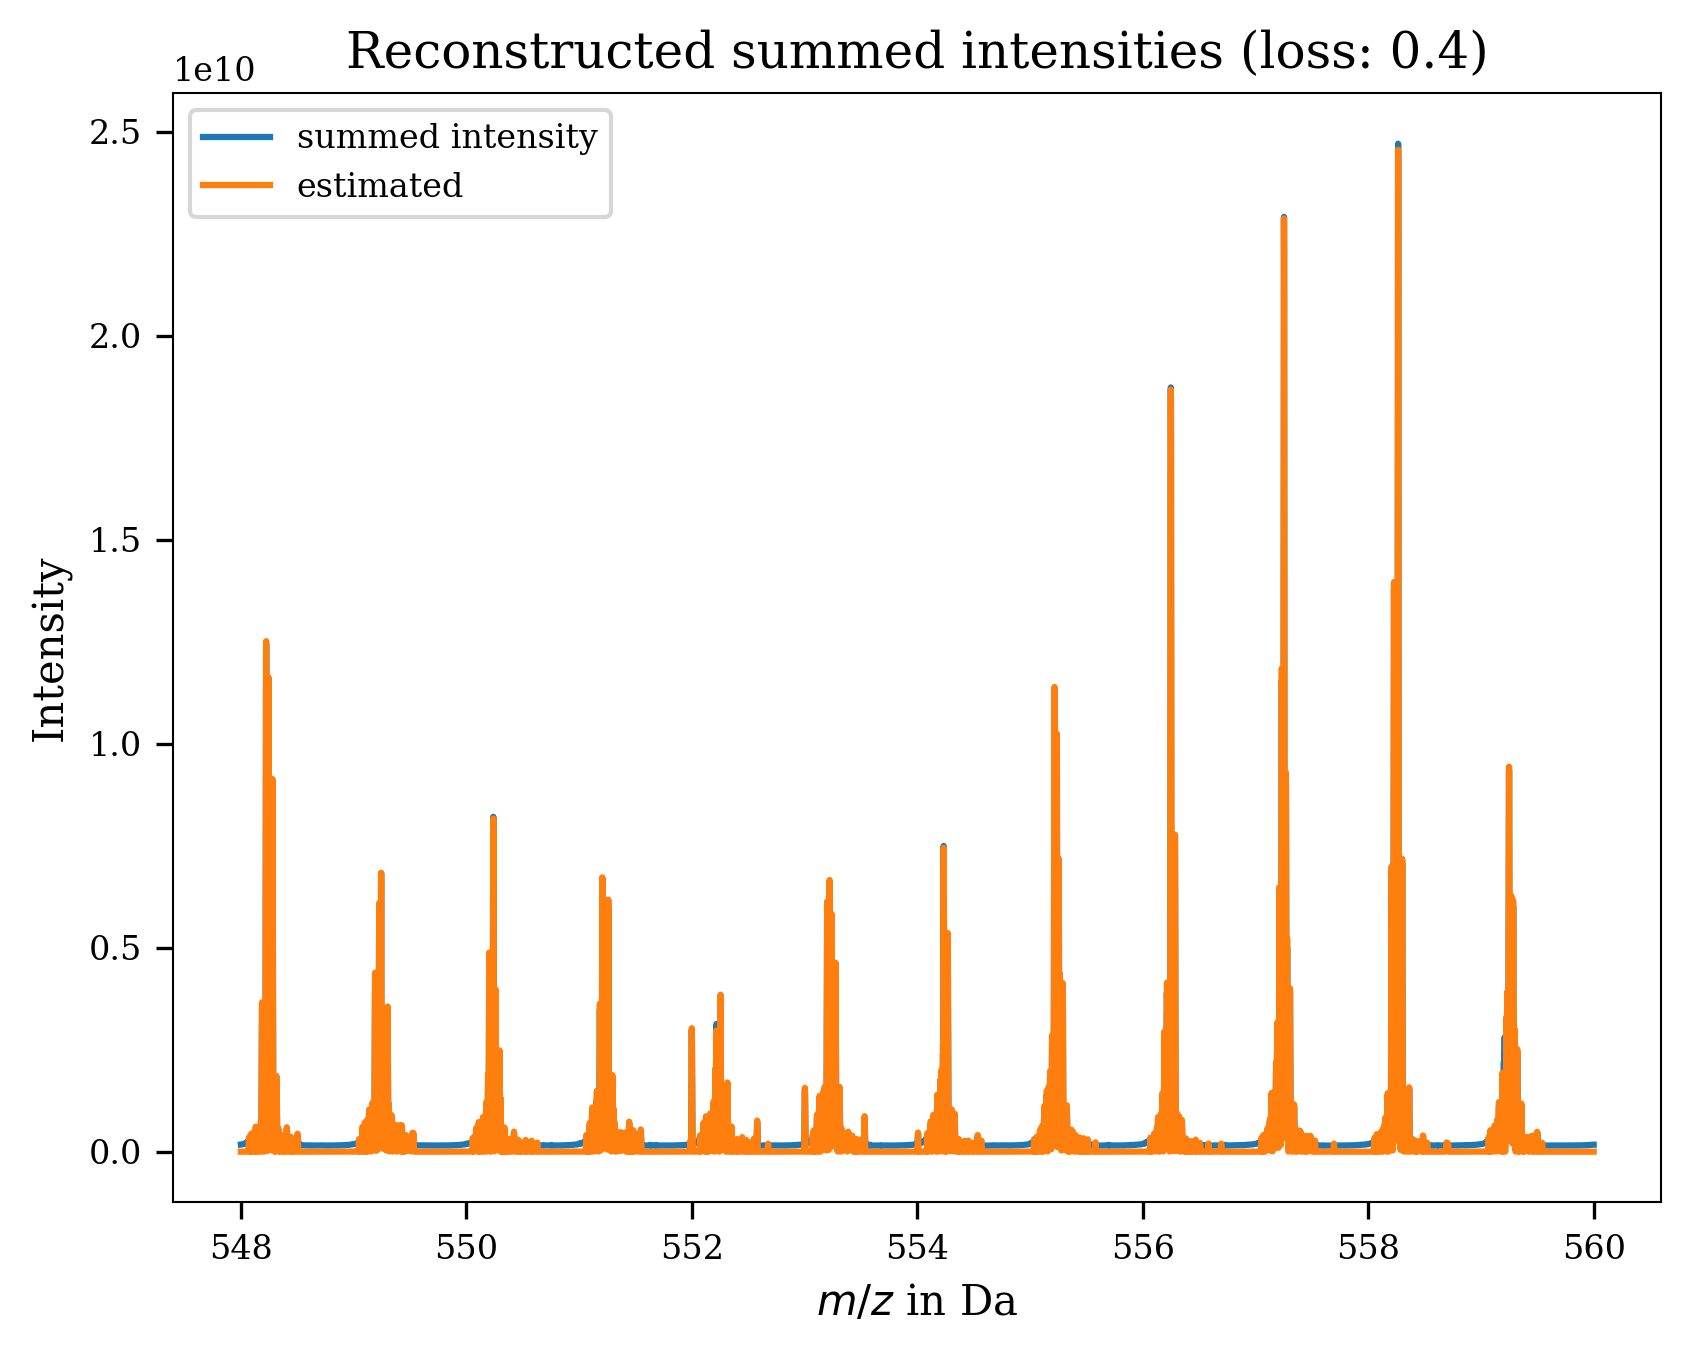

path_folder: C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
d_folder: 2018_08_27 Cariaco 490-495 alkenones.d
_delta_mz: 0.0001
_indices: Numpy array of type int32, with shape (17118,)
_limits: Numpy array of type float64, with shape (2,)
_mzs: Numpy array of type float64, with shape (120002,)
_intensities: Numpy array of type float64, with shape (120002,)
_tic: Numpy array of type float64, with shape (17118,)
_noise_level: Numpy array of type float64, with shape (120002,)
_noise_level_subtracted: False
_peaks: Numpy array of type int64, with shape (465,)
_peak_properties: prominences: [1.93047973e+07 7.31488332e+07 1.09504310e+08 1.77015543e+08
 3.63968797e+07 3.68501044e+07 9.84172617e+07 2.81776382e+09
 4.13403662e+07 8.39352612e+08 1.22698963e+10 4.13444128e+08
 1.04435066e+10 9.06461467e+07 2.27779057e+09 6.13632661e+08
 4.20420596e+08 8.41462741e+09 5.03129812e+08 1.18090116e+08
 8.22872068e+07 1.42613948e+09 3.27455544e+07 1.32

In [8]:
project.require_spectra(overwrite=False, plts=True)

Or, for exported txt files replace the cell above with `project.require_da_export()`

Alright, now let's set the data object:

In [9]:
project.require_data_object()

mis_file: 2018_08_27 Cariaco 490-495 alkenones.mis
path_folder: C:\Users\Yannick Zander\Promotion\Cariaco MSI 2024\490-495cm\2018_08_27 Cariaco 490-495 alkenones.i
d_folder: 2018_08_27 Cariaco 490-495 alkenones.d
_distance_pixels: 100.0
_feature_table: Pandas DataFrame with columns [548.0708, 548.0768, 548.0924, 548.1308, 548.1515, 548.1608, 548.1776, 548.1872, 548.2066, 548.2138, ...], indices [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ...] and shape (17118, 469)

## Adding Image Attributes
Great! now we can combine the measurement with information from the images. But be careful with attributes from the `ImageClassified` class because it may have some distortion correction applied to it, we will show how to add that information later.

In [10]:
project.add_pixels_ROI()
project.add_photo()
project.add_holes()
project.add_light_dark_classification()

found empty feature table


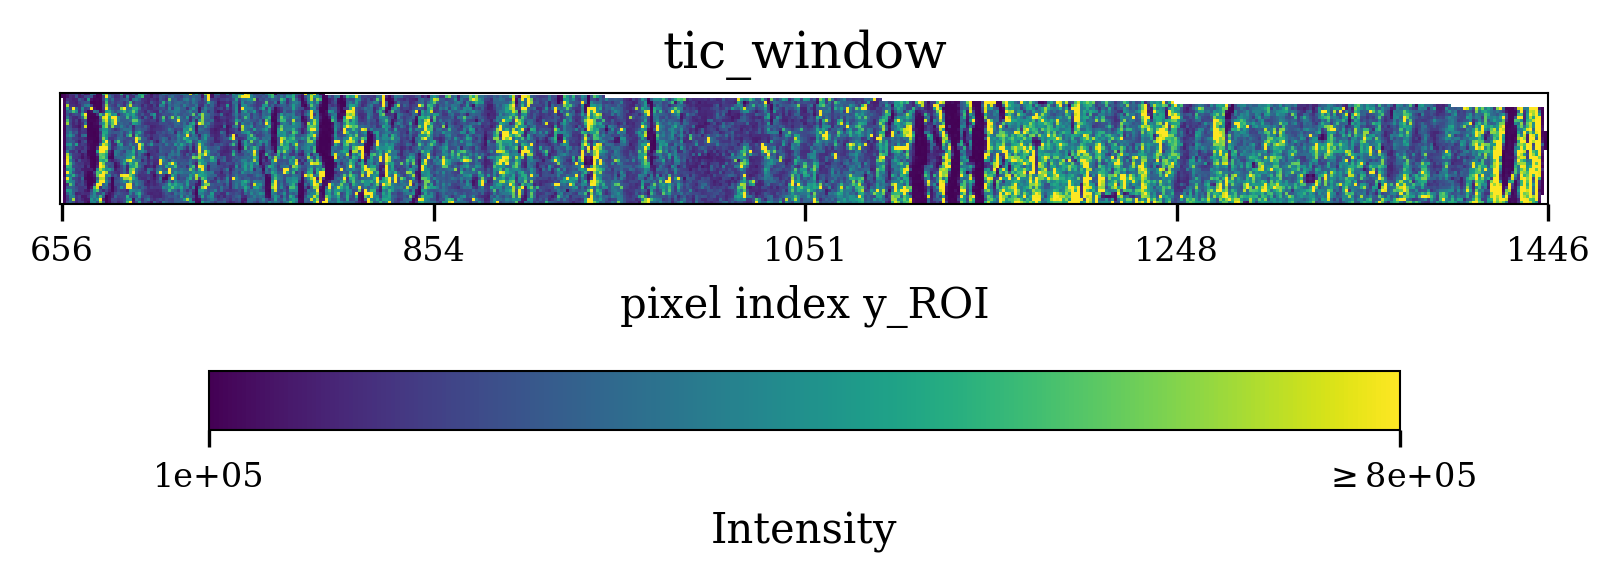

In [11]:
project.plot_comp('tic_window', 'data_object')

While we are at it, let's also add the total ion count recorded during the acquisition (not the one calculated by the Spectra object which only considers ions within the QTOF window 

In [12]:
project.add_tic()

found empty feature table


found empty feature table


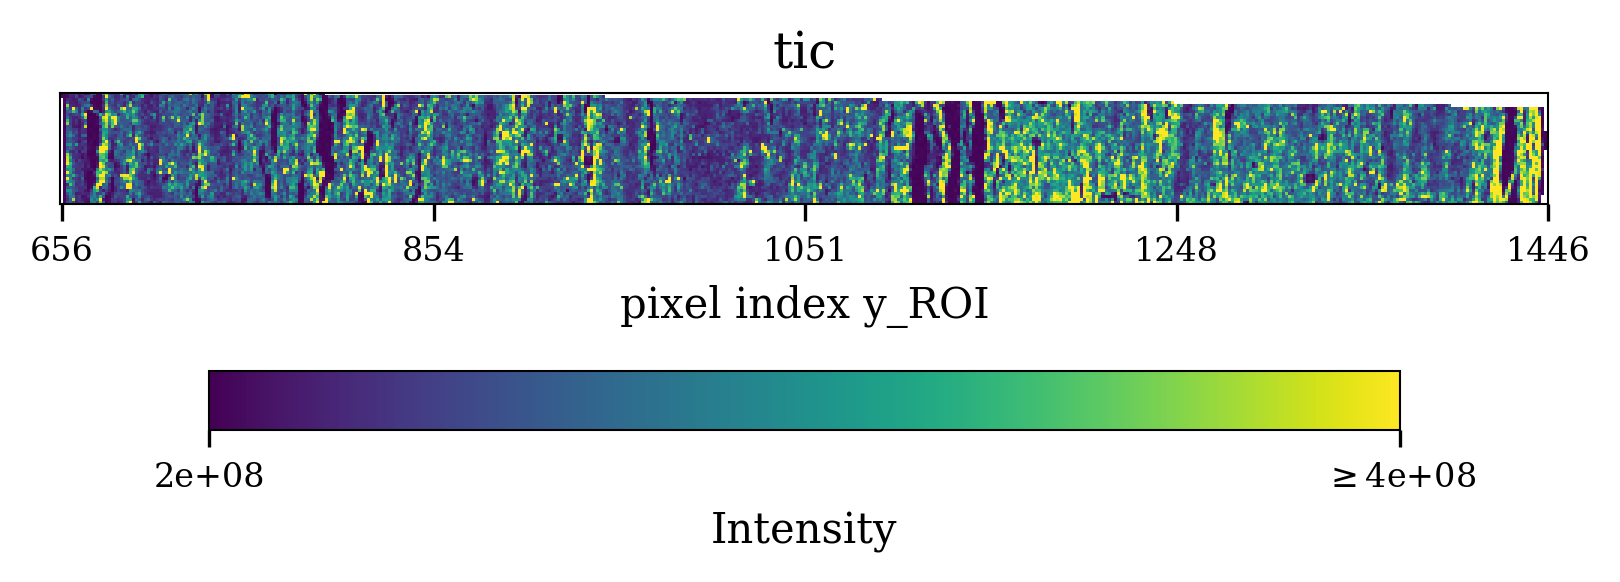

In [13]:
project.plot_comp('tic', 'data_object')

In [15]:
import numpy as np
np.any(project.data_object.feature_table)

True

In [ ]:
## Add X-ray

## Transform MSI using tilt correction
(i did that somewhere, but can remember where